**EXERCISE 1: AGGLOMERATIVE CLUSTERING**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

In [ ]:
# Load the cc_general.csv file 
  
X = pd.read_csv('/content/cc_general.csv') 
  
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

In [ ]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

Use Principal Component Analysis with two components

In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

Plot a dendogram

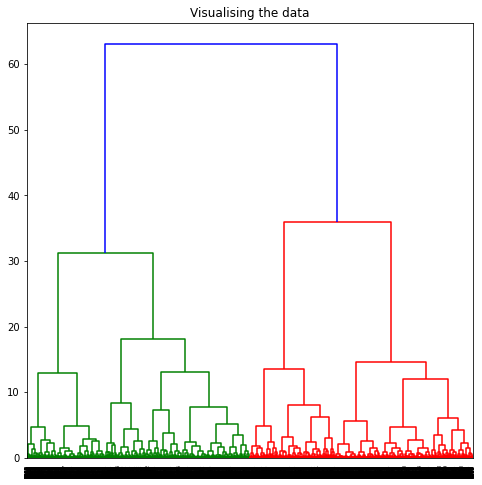

In [ ]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

Use Agglomerative Clustering with 2, 3, and 4 clusters

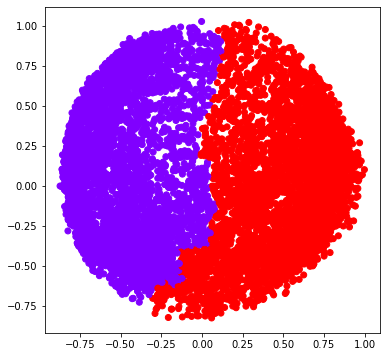

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

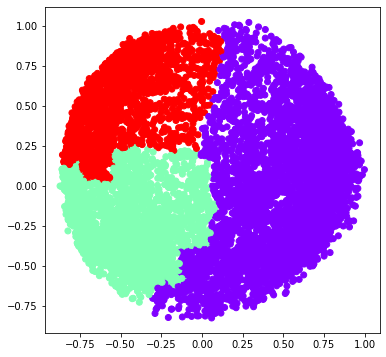

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

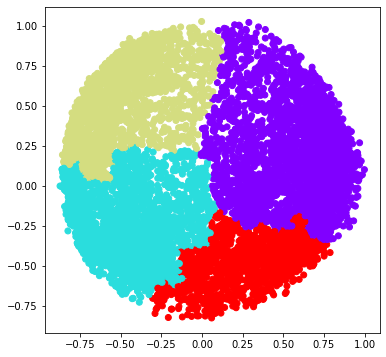

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

Compute the silhouette scores with K = 2, 3, and 4
The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 

In [ ]:
k = [2, 3, 4] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))

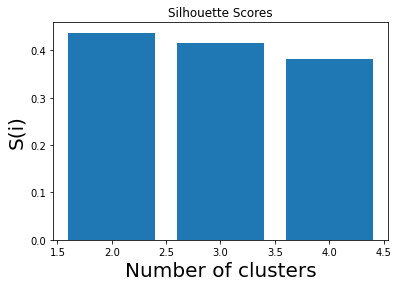

In [ ]:
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

**EXERCISE 2: AGGLOMERATIVE CLUSTERING**


Illustration on how to use linkage and affinity, as well as
sklearn and SciPy approach

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
ac = AgglomerativeClustering(n_clusters = 8, affinity="euclidean", linkage="average")
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
distances = linkage(X, method="centroid", metric="euclidean")
sklearn_clusters = ac.fit_predict(X)
scipy_clusters = fcluster(distances, 3, criterion="distance")

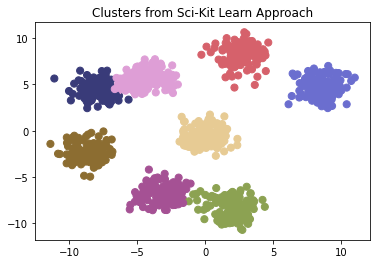

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

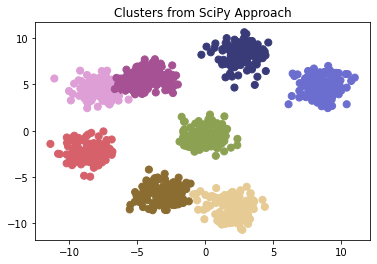

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Clusters from SciPy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()